In [1]:
# All the packages that we need to import
import numpy as np               # for linear algebra
import pandas as pd              # for tabular output
from scipy.stats import rankdata # for ranking the candidates

In [2]:
parameters = np.array(["Accuracy", "Precision", "Recall","F1_Score","Average_Inference_Time_per_Image","Average_Specificity","f2_score","Inference_Speed","Model_Complexity"])

models = np.array([
    "MobileNetLarge",
    "MobileNetV2",
    "MobileNetV3Small",
    "CNN",
    "DenseNet121",
    "InceptionV3",
    "ResNet50",
    "VGG16",
    "Xception"
])

raw_data = [
    [0.44271844, 0.195999622, 0.44271844, 0.2717087, 0.325967182, 0.814239482, 0.353678366, 3.067793, 1683556],
    [0.845631067, 0.8453475, 0.845631067, 0.82682167, 0.3011083, 0.955117329, 0.833128509, 3.32106366, 2011236],
    [0.44271844, 0.19599962, 0.44271844, 0.2717087, 0.18834417, 0.814239482, 0.35367833, 5.3094289, 1290340],
    [0.924271844, 0.94338768, 0.924271844, 0.92371375, 0.241756687, 0.9763349, 0.92170877, 4.13639023, 2096644],
    [0.892233, 0.868057415, 0.892233009, 0.871394884, 0.9905691, 0.96921399, 0.88133066, 1.00952061, 1749092],
    [0.71650485, 0.775168106, 0.716504854, 0.62430125, 0.488048427, 0.926465493, 0.67149392, 2.048976996, 2797668],
    [0.44271844, 0.195999622, 0.44271844, 0.271708764, 1.072094162, 0.814239, 0.353678, 0.93275389, 2797668],
    [0.9262135, 0.9289587, 0.9262135, 0.926154, 2.20249036, 0.97628455, 0.9247095, 0.454031498, 1224804],
    [0.968932, 0.9727121, 0.968932039, 0.969010886, 3.86714377, 0.98971722, 0.96852653, 0.25858878, 2797668]
]

# # Convert data into the desired format
# raw_data = np.array([
#     [int(row[8]), row[0], row[1], row[2], row[3]]
#     for row in data
# ])

# print(data)

weights = np.array([0.3, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.05, 0.05])

# The indices of the attributes (zero-based) that are considered beneficial.
# Those indices not mentioned are assumed to be cost attributes.
benefit_parameters = set([0, 1, 2, 3, 4, 5, 6, 7, 8])

# Display the raw data we have
pd.DataFrame(data=raw_data, index=models)

,0,1,2,3,4,5,6,7,8
MobileNetLarge,0.442718,0.196000,0.442718,0.271709,0.325967,0.814239,0.353678,3.067793,1683556
MobileNetV2,0.845631,0.845348,0.845631,0.826822,0.301108,0.955117,0.833129,3.321064,2011236
MobileNetV3Small,0.442718,0.196000,0.442718,0.271709,0.188344,0.814239,0.353678,5.309429,1290340
CNN,0.924272,0.943388,0.924272,0.923714,0.241757,0.976335,0.921709,4.136390,2096644
DenseNet121,0.892233,0.868057,0.892233,0.871395,0.990569,0.969214,0.881331,1.009521,1749092
InceptionV3,0.716505,0.775168,0.716505,0.624301,0.488048,0.926465,0.671494,2.048977,2797668
ResNet50,0.442718,0.196000,0.442718,0.271709,1.072094,0.814239,0.353678,0.932754,2797668
VGG16,0.926214,0.928959,0.926214,0.926154,2.202490,0.976285,0.924709,0.454031,1224804
Xception,0.968932,0.972712,0.968932,0.969011,3.867144,0.989717,0.968527,0.258589,2797668


In [5]:
import numpy as np
import pandas as pd


raw_data = np.array([
    [0.44271844, 0.195999622, 0.44271844, 0.2717087, 0.325967182, 0.814239482, 0.353678366, 3.067793, 1683556],
    [0.845631067, 0.8453475, 0.845631067, 0.82682167, 0.3011083, 0.955117329, 0.833128509, 3.32106366, 2011236],
    [0.44271844, 0.19599962, 0.44271844, 0.2717087, 0.18834417, 0.814239482, 0.35367833, 5.3094289, 1290340],
    [0.924271844, 0.94338768, 0.924271844, 0.92371375, 0.241756687, 0.9763349, 0.92170877, 4.13639023, 2096644],
    [0.892233, 0.868057415, 0.892233009, 0.871394884, 0.9905691, 0.96921399, 0.88133066, 1.00952061, 1749092],
    [0.71650485, 0.775168106, 0.716504854, 0.62430125, 0.488048427, 0.926465493, 0.67149392, 2.048976996, 2797668],
    [0.44271844, 0.195999622, 0.44271844, 0.271708764, 1.072094162, 0.814239, 0.353678, 0.93275389, 2797668],
    [0.9262135, 0.9289587, 0.9262135, 0.926154, 2.20249036, 0.97628455, 0.9247095, 0.454031498, 1224804],
    [0.968932, 0.9727121, 0.968932039, 0.969010886, 3.86714377, 0.98971722, 0.96852653, 0.25858878, 2797668]
])

m = len(raw_data)
n = len(parameters)
divisors = np.empty(n)

for j in range(n):
    column = raw_data[:, j]
    divisors[j] = np.sqrt(column @ column)

raw_data /= divisors

columns = ["X%d" % j for j in range(n)]
normalized_df = pd.DataFrame(data=raw_data, index=models, columns=columns)
print(normalized_df)


                        X0        X1        X2        X3        X4        X5  \
MobileNetLarge    0.192970  0.088694  0.192970  0.125274  0.068773  0.295651   
MobileNetV2       0.368589  0.382538  0.368589  0.381215  0.063528  0.346804   
MobileNetV3Small  0.192970  0.088694  0.192970  0.125274  0.039737  0.295651   
CNN               0.402867  0.426904  0.402867  0.425888  0.051006  0.354508   
DenseNet121       0.388902  0.392815  0.388902  0.401766  0.208991  0.351922   
InceptionV3       0.312306  0.350781  0.312306  0.287841  0.102969  0.336400   
ResNet50          0.192970  0.088694  0.192970  0.125274  0.226191  0.295651   
VGG16             0.403713  0.420374  0.403713  0.427013  0.464683  0.354490   
Xception          0.422333  0.440174  0.422333  0.446773  0.815893  0.359367   

                        X6        X7        X8  
MobileNetLarge    0.159132  0.361289  0.262989  
MobileNetV2       0.374854  0.391117  0.314177  
MobileNetV3Small  0.159132  0.625284  0.201565  
CNN

In [6]:
raw_data *= weights
pd.DataFrame(data=raw_data, index=models, columns=columns)

,X0,X1,X2,X3,X4,X5,X6,X7,X8
MobileNetLarge,0.057891,0.017739,0.038594,0.025055,0.006877,0.029565,0.015913,0.018064,0.013149
MobileNetV2,0.110577,0.076508,0.073718,0.076243,0.006353,0.034680,0.037485,0.019556,0.015709
MobileNetV3Small,0.057891,0.017739,0.038594,0.025055,0.003974,0.029565,0.015913,0.031264,0.010078
CNN,0.120860,0.085381,0.080573,0.085178,0.005101,0.035451,0.041471,0.024357,0.016376
DenseNet121,0.116670,0.078563,0.077780,0.080353,0.020899,0.035192,0.039654,0.005944,0.013661
InceptionV3,0.093692,0.070156,0.062461,0.057568,0.010297,0.033640,0.030213,0.012065,0.021851
ResNet50,0.057891,0.017739,0.038594,0.025055,0.022619,0.029565,0.015913,0.005492,0.021851
VGG16,0.121114,0.084075,0.080743,0.085403,0.046468,0.035449,0.041606,0.002674,0.009566
Xception,0.126700,0.088035,0.084467,0.089355,0.081589,0.035937,0.043577,0.001523,0.021851


In [7]:
a_pos = np.zeros(n)
a_neg = np.zeros(n)
for j in range(n):
    column = raw_data[:,j]
    max_val = np.max(column)
    min_val = np.min(column)
    
    # See if we want to maximize benefit or minimize cost (for PIS)
    if j in benefit_parameters:
        a_pos[j] = max_val
        a_neg[j] = min_val
    else:
        a_pos[j] = min_val
        a_neg[j] = max_val

pd.DataFrame(data=[a_pos, a_neg], index=["A+", "A-"], columns=columns)

,X0,X1,X2,X3,X4,X5,X6,X7,X8
A+,0.126700,0.088035,0.084467,0.089355,0.081589,0.035937,0.043577,0.031264,0.021851
A-,0.057891,0.017739,0.038594,0.025055,0.003974,0.029565,0.015913,0.001523,0.009566


In [8]:
sp = np.zeros(m)
sn = np.zeros(m)
cs = np.zeros(m)

for i in range(m):
    diff_pos = raw_data[i] - a_pos
    diff_neg = raw_data[i] - a_neg
    sp[i] = np.sqrt(diff_pos @ diff_pos)
    sn[i] = np.sqrt(diff_neg @ diff_neg)
    cs[i] = sn[i] / (sp[i] + sn[i])

pd.DataFrame(data=zip(sp, sn, cs), index=models, columns=["S+", "S-", "C+"])

,S+,S-,C+
MobileNetLarge,0.150175,0.017173,0.102616
MobileNetV2,0.080959,0.104612,0.563730
MobileNetV3Small,0.151273,0.029746,0.164325
CNN,0.077502,0.123184,0.613814
DenseNet121,0.068727,0.112544,0.620860
InceptionV3,0.092406,0.078608,0.459657
ResNet50,0.144439,0.022679,0.135706
VGG16,0.047774,0.127741,0.727809
Xception,0.029741,0.151314,0.835733


In [9]:
def rank_according_to(data):
    ranks = rankdata(data).astype(int)
    ranks -= 1
    return models[ranks][::-1]

In [10]:
cs_order = rank_according_to(cs)
sp_order = rank_according_to(sp)
sn_order = rank_according_to(sn)

# pd.DataFrame(data=zip(cs_order, sp_order, sn_order), index=range(1, m + 1), columns=["C+", "S+", "S-"])
ranked_df = pd.DataFrame(data=zip(cs_order, sp_order, sn_order), index=range(1, m + 1), columns=["C+", "S+", "S-"])
ranked_df


,C+,S+,S-
1,Xception,MobileNetLarge,Xception
2,VGG16,MobileNetV2,VGG16
3,MobileNetV2,ResNet50,MobileNetV2
4,CNN,InceptionV3,CNN
5,ResNet50,MobileNetV3Small,InceptionV3
6,InceptionV3,CNN,ResNet50
7,MobileNetV3Small,Xception,MobileNetV3Small
8,DenseNet121,DenseNet121,DenseNet121
9,MobileNetLarge,VGG16,MobileNetLarge


In [12]:
print("The best Model according to C+ is " + cs_order[0])
print("The preferences in descending order are " + ", ".join(cs_order) + ".")

The best Model according to C+ is Xception
The preferences in descending order are Xception, VGG16, MobileNetV2, CNN, ResNet50, InceptionV3, MobileNetV3Small, DenseNet121, MobileNetLarge.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

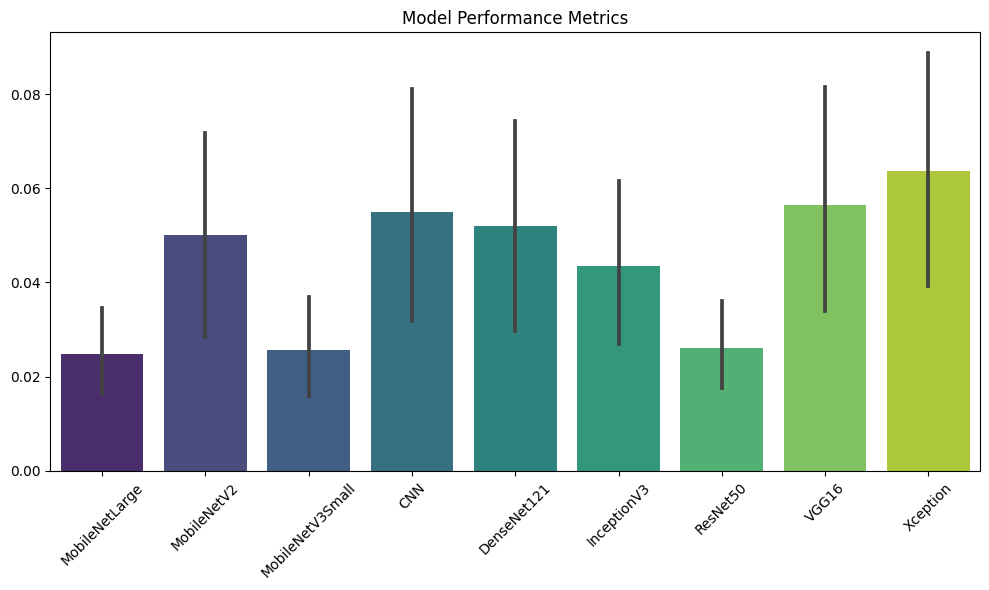

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code for creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=normalized_df.transpose(), palette="viridis")
plt.title("Model Performance Metrics")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a high-quality PNG file on the desktop
plt.savefig(r'C:\Users\Lenovo\Desktop\model_performance.png', format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


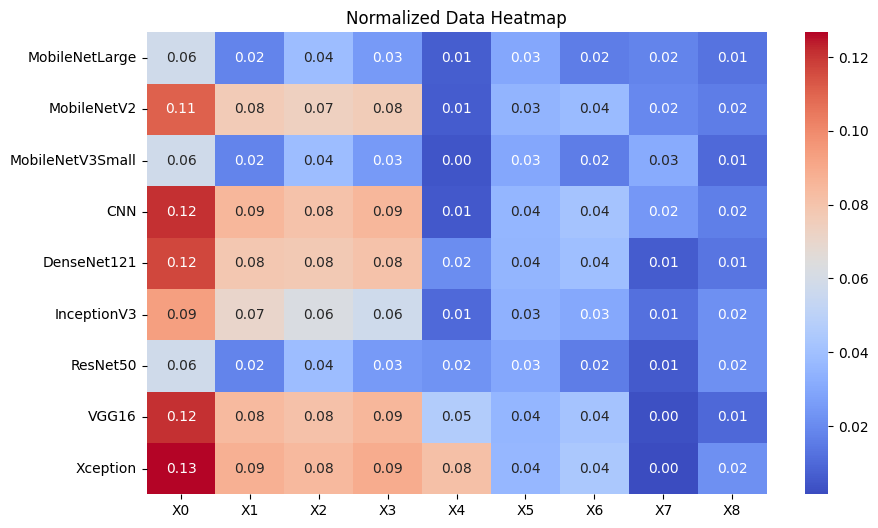

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code for creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Normalized Data Heatmap")

# Save the heatmap as a high-quality PNG file on the desktop
plt.savefig(r'C:\Users\Lenovo\Desktop\normalized_data_heatmap.png', format="png", dpi=300, bbox_inches="tight")


# Show the heatmap
plt.show()


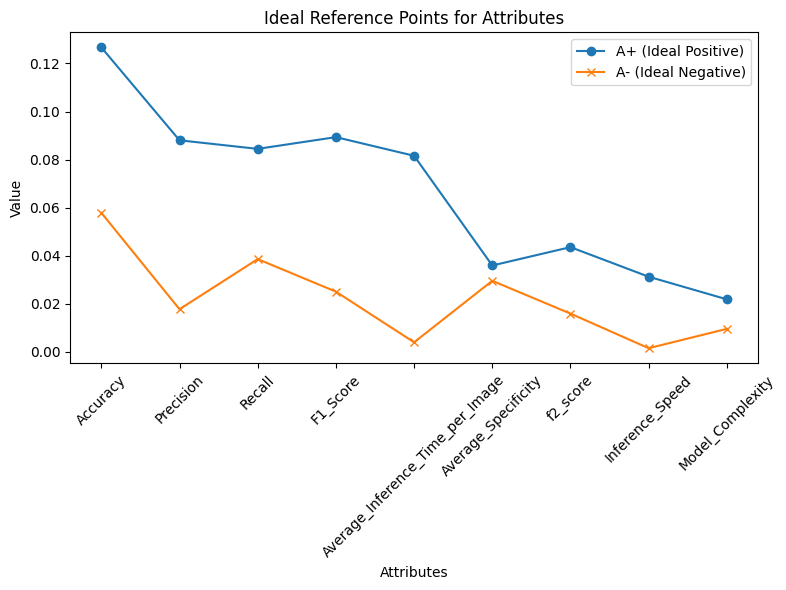

In [35]:
import matplotlib.pyplot as plt

# Your code for creating the "Ideal Reference Points Plot"
plt.figure(figsize=(8, 6))
plt.plot(parameters, a_pos, marker="o", label="A+ (Ideal Positive)")
plt.plot(parameters, a_neg, marker="x", label="A- (Ideal Negative)")
plt.title("Ideal Reference Points for Attributes")
plt.xlabel("Attributes")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save the plot as a high-quality PNG file on the desktop
plt.savefig(r'C:\Users\Lenovo\Desktop\ideal_reference_points_plot.png', format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

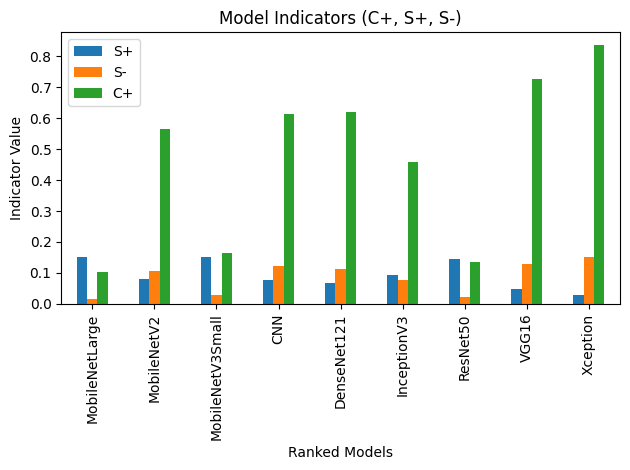

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your model names and indicator values
models = ["MobileNetLarge", "MobileNetV2", "MobileNetV3Small", "CNN", "DenseNet121", "InceptionV3", "ResNet50", "VGG16", "Xception"]
s_plus_values = [0.150175, 0.080959, 0.151273, 0.077502, 0.068727, 0.092406, 0.144439, 0.047774, 0.029741]
s_minus_values = [0.017173, 0.104612, 0.029746, 0.123184, 0.112544, 0.078608, 0.022679, 0.127741, 0.151314]
c_plus_values = [0.102616, 0.563730, 0.164325, 0.613814, 0.620860, 0.459657, 0.135706, 0.727809, 0.835733]

# Create the ranked_df DataFrame
ranked_df = pd.DataFrame(data={"S+": s_plus_values, "S-": s_minus_values, "C+": c_plus_values}, index=models)

# Create the indicator plot
plt.figure(figsize=(10, 6))
ax = ranked_df.plot(kind="bar")
plt.title("Model Indicators (C+, S+, S-)")
plt.xlabel("Ranked Models")
plt.ylabel("Indicator Value")

# Rotate x-axis labels (model names) to be vertical
ax.set_xticklabels(models, rotation=90)

plt.tight_layout()

# Save the plot as a high-quality PNG file on the desktop
plt.savefig(r'C:\Users\Lenovo\Desktop\model_indicators_plot.png', format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


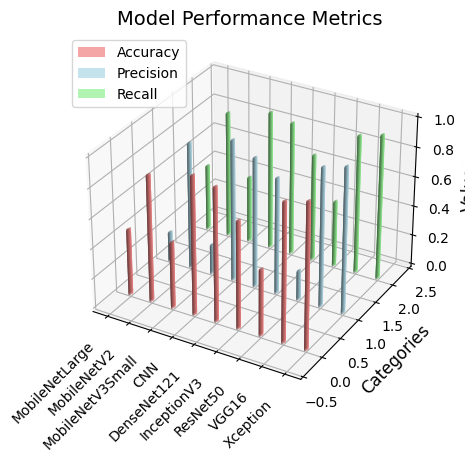

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Define the model names
model_names = [
    "MobileNetLarge", "MobileNetV2", "MobileNetV3Small", "CNN", "DenseNet121",
    "InceptionV3", "ResNet50", "VGG16", "Xception"
]

# Define the values for Accuracy, Precision, and Recall for each model
accuracy = [0.442718, 0.845631, 0.442718, 0.924272, 0.892233, 0.716505, 0.442718, 0.926214, 0.968932]
precision = [0.196000, 0.845348, 0.196000, 0.943388, 0.868057, 0.775168, 0.196000, 0.928959, 0.972712]
recall = [0.442718, 0.845631, 0.442718, 0.924272, 0.892233, 0.716505, 0.442718, 0.926214, 0.968932]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the categories and their corresponding colors
categories = ["Accuracy", "Precision", "Recall"]
colors = ['lightcoral', 'lightblue', 'lightgreen']

# Create numerical values for the models
x = list(range(len(model_names)))

# Create the 3D pipe graph
for i, category in enumerate(categories):
    values = accuracy if category == "Accuracy" else precision if category == "Precision" else recall
    ax.bar(x, values, zs=i, zdir='y', width=0.2, color=colors[i], alpha=0.7, label=category)

# Function to plot a 3D cylinder
def plot_cylinder(x, y, z, dx, dy, dz, color):
    phi = np.linspace(0, 2 * np.pi, 100)
    _x = np.outer(dx / 2 * np.cos(phi), np.ones_like(phi))
    _y = np.outer(dy / 2 * np.sin(phi), np.ones_like(phi))
    _z = np.outer(np.ones_like(dx), dz * phi / (2 * np.pi))
    ax.plot_surface(x + _x, y + _y, z + _z, color=color)

# Create the pipe shapes for the bars
for i, category in enumerate(categories):
    values = accuracy if category == "Accuracy" else precision if category == "Precision" else recall
    for j in x:
        plot_cylinder(x[j], i, 0, 0.1, 0.1, values[j], color=colors[i])

# Customize the graph
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Categories', fontsize=12)
ax.set_zlabel('Values', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14)

# Set the tick labels for the X-axis as model names
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right", fontsize=10)

# Add a legend
ax.legend(loc='upper left', fontsize=10)

# Add grid lines for better readability
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Adjust the limits for a better view
ax.set_xlim(-0.5, len(x) - 0.5)
ax.set_ylim(-0.5, len(categories) - 0.5)
ax.set_zlim(0, 1)
# Save the plot as a high-quality PNG file on the desktop
plt.savefig(r'C:\Users\Lenovo\Desktop\Accuracy_Precision_Recall.png', format="png", dpi=300, bbox_inches="tight")
# Display the 3D pipe graph
plt.show()


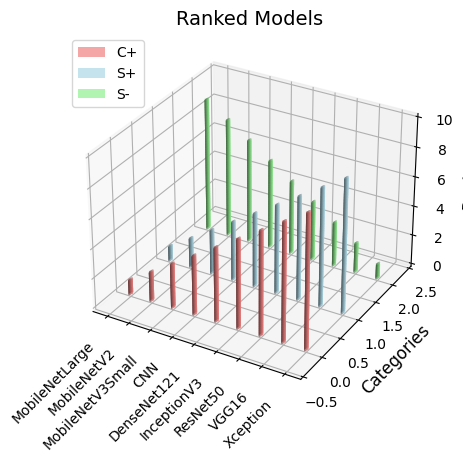

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the model names
model_names = [
    "MobileNetLarge", "MobileNetV2", "MobileNetV3Small", "CNN", "DenseNet121",
    "InceptionV3", "ResNet50", "VGG16", "Xception"
]  # Use the index from the ranked DataFrame

# Define the ranks for C+, S+, and S-
c_plus = range(1, len(model_names) + 1)
s_plus = range(1, len(model_names) + 1)
s_minus = range(len(model_names), 0, -1)

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the categories and their corresponding colors
categories = ["C+", "S+", "S-"]
colors = ['lightcoral', 'lightblue', 'lightgreen']

# Create numerical values for the models
x = list(range(len(model_names)))

# Create the 3D pipe graph
for i, category in enumerate(categories):
    values = c_plus if category == "C+" else s_plus if category == "S+" else s_minus
    ax.bar(x, values, zs=i, zdir='y', width=0.2, color=colors[i], alpha=0.7, label=category)

# Function to plot a 3D cylinder
def plot_cylinder(x, y, z, dx, dy, dz, color):
    phi = np.linspace(0, 2 * np.pi, 100)
    _x = np.outer(dx / 2 * np.cos(phi), np.ones_like(phi))
    _y = np.outer(dy / 2 * np.sin(phi), np.ones_like(phi))
    _z = np.outer(np.ones_like(dx), dz * phi / (2 * np.pi))
    ax.plot_surface(x + _x, y + _y, z + _z, color=color)

# Create the pipe shapes for the bars
for i, category in enumerate(categories):
    values = c_plus if category == "C+" else s_plus if category == "S+" else s_minus
    for j in x:
        plot_cylinder(x[j], i, 0, 0.1, 0.1, values[j], color=colors[i])

# Customize the graph
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Categories', fontsize=12)
ax.set_zlabel('Ranks', fontsize=12)
ax.set_title('Ranked Models', fontsize=14)

# Set the tick labels for the X-axis as model names
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right", fontsize=10)

# Add a legend
ax.legend(loc='upper left', fontsize=10)

# Add grid lines for better readability
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Adjust the limits for a better view
ax.set_xlim(-0.5, len(x) - 0.5)
ax.set_ylim(-0.5, len(categories) - 0.5)
ax.set_zlim(0, len(model_names) + 1)

# Save the plot as a high-quality PNG file
plt.savefig('Ranked_Models_Pipe_Graph.png', format="png", dpi=300, bbox_inches="tight")
plt.savefig(r'C:\Users\Lenovo\Desktop\Ranked_Models.png', format="png", dpi=300, bbox_inches="tight")
# Display the 3D pipe graph
plt.show()


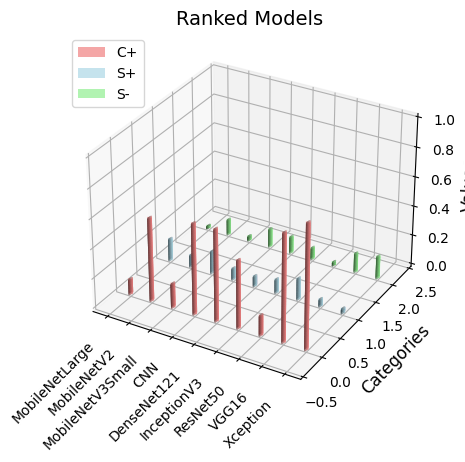

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the model names and indicator values
model_data = {
    "MobileNetLarge": [0.150175, 0.017173, 0.102616],
    "MobileNetV2": [0.080959, 0.104612, 0.563730],
    "MobileNetV3Small": [0.151273, 0.029746, 0.164325],
    "CNN": [0.077502, 0.123184, 0.613814],
    "DenseNet121": [0.068727, 0.112544, 0.620860],
    "InceptionV3": [0.092406, 0.078608, 0.459657],
    "ResNet50": [0.144439, 0.022679, 0.135706],
    "VGG16": [0.047774, 0.127741, 0.727809],
    "Xception": [0.029741, 0.151314, 0.835733]
}

model_names = list(model_data.keys())
c_plus = [model_data[model][2] for model in model_names]
s_plus = [model_data[model][0] for model in model_names]
s_minus = [model_data[model][1] for model in model_names]

# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the categories and their corresponding colors
categories = ["C+", "S+", "S-"]
colors = ['lightcoral', 'lightblue', 'lightgreen']

# Create numerical values for the models
x = list(range(len(model_names)))

# Create the 3D pipe graph
for i, category in enumerate(categories):
    values = c_plus if category == "C+" else s_plus if category == "S+" else s_minus
    ax.bar(x, values, zs=i, zdir='y', width=0.2, color=colors[i], alpha=0.7, label=category)

# Function to plot a 3D cylinder
def plot_cylinder(x, y, z, dx, dy, dz, color):
    phi = np.linspace(0, 2 * np.pi, 100)
    _x = np.outer(dx / 2 * np.cos(phi), np.ones_like(phi))
    _y = np.outer(dy / 2 * np.sin(phi), np.ones_like(phi))
    _z = np.outer(np.ones_like(dx), dz * phi / (2 * np.pi))
    ax.plot_surface(x + _x, y + _y, z + _z, color=color)

# Create the pipe shapes for the bars
for i, category in enumerate(categories):
    values = c_plus if category == "C+" else s_plus if category == "S+" else s_minus
    for j in x:
        plot_cylinder(x[j], i, 0, 0.1, 0.1, values[j], color=colors[i])

# Customize the graph
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Categories', fontsize=12)
ax.set_zlabel('Values', fontsize=12)
ax.set_title('Ranked Models', fontsize=14)

# Set the tick labels for the X-axis as model names
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right", fontsize=10)

# Add a legend
ax.legend(loc='upper left', fontsize=10)

# Add grid lines for better readability
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Adjust the limits for a better view
ax.set_xlim(-0.5, len(x) - 0.5)
ax.set_ylim(-0.5, len(categories) - 0.5)
ax.set_zlim(0, 1)

# Save the plot as a high-quality PNG file
plt.savefig(r'C:\Users\Lenovo\Desktop\Ranked_Models.png', format="png", dpi=300, bbox_inches="tight")

# Display the 3D pipe graph
plt.show()
